In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/Lenka/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#export train and test data
#assign FIPS as an index
data = pd.read_csv('data_train.csv')
data.index=data.FIPS
data.drop('FIPS',axis=1,inplace=True)

data_test = pd.read_csv('data_test.csv')
data_test.index=data_test.FIPS
data_test.drop('FIPS',axis=1,inplace=True)

data.head()

,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,PCT_LACCESS_HHNV10,GROCPTH07,SUPERCPTH07,CONVSPTH07,SPECSPTH07,SNAPSPTH08,...,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC10,POVRATE10,PERPOV10,CHILDPOVRATE10,PERCHLDPOV10,METRO13,POPLOSS00,PCT_OBESE_ADULTS10
FIPS,,,,,,,,,,,,,,,,,,,,,
19109,46.190288,11.392737,10.532197,10.594349,2.188645,0.517598,0.000000,1.293996,0.064700,0.634088,...,21.868365,22.872032,47930,10.3,0,13.8,0,0,1,31.1
39131,23.128594,10.872407,5.595606,4.319223,6.841612,0.179115,0.071646,0.716461,0.000000,1.059993,...,14.671357,24.800585,35051,26.3,0,36.9,1,0,0,32.1
5015,8.595426,4.054456,2.188032,1.396943,2.017592,0.183298,0.036660,1.759660,0.109979,0.415363,...,18.694892,22.527873,33789,16.4,0,26.5,1,0,0,28.7
47143,8.224891,4.529821,2.204625,1.070721,3.097653,0.196303,0.032717,0.556192,0.000000,0.909266,...,15.706247,23.439907,36308,20.6,0,32.2,0,0,0,37.2
19155,37.655753,12.175355,9.390865,5.193847,2.091801,0.167463,0.022328,0.502389,0.089314,0.526934,...,14.312244,24.129973,47870,14.5,0,19.4,0,1,0,33.6


### Description of the columns with the variable types is below

Index|FieldName|Type|Unit|Description
----|---------|----|-----------
0|PCT_LACCESS_POP10|Percent|float|Population, low access to store (%), 2010
1|PCT_LACCESS_LOWI10|Percent|float|Low income & low access to store (%), 2010
2|PCT_LACCESS_CHILD10|Percent|float|Children, low access to store (%), 2010
3|PCT_LACCESS_SENIORS10|Percent|float|Seniors, low access to store (%), 2010
4|PCT_LACCESS_HHNV10|Percent|float|Households, no car & low access to store (%), 2010
5|GROCPTH07|# per 1,000 pop|float|Grocery stores/1,000 pop, 2007
6|SUPERCPTH07|# per 1,000 pop|float|Supercenters & club stores/1,000 pop, 2007
7|CONVSPTH07|# per 1,000 pop|float|Convenience stores/1,000 pop, 2007
8|SPECSPTH07|# per 1,000 pop|float|Specialized food stores/1,000 pop, 2007
9|SNAPSPTH08|# per 1,000 pop|float|SNAP-authorized stores/1,000 pop, 2008
10|WICSPTH08|# per 1,000 pop|float|WIC-authorized stores/1,000 pop, 2008
11|FFRPTH07|# per 1,000 pop|float|Fast-food restaurants/1,000 pop, 2007
12|FSRPTH07|# per 1,000 pop|float|Full-service restaurants/1,000 pop, 2007
13|PC_FFRSALES07|Dollars|float|Expenditures per capita, fast food, 2007 (State level)
14|PC_FSRSALES07|Dollars|float|Expenditures per capita, restaurants, 2007 (State level)
15|PCT_SNAP09|Percent|float|SNAP participants (% pop), 2009  (State level)
16|SNAP_PART_RATE10|Percent|float|SNAP participants (% eligible pop), 2010  (State level)
17|SNAP_OAPP10|Classification|float (0, 0.5 or 1)|SNAP online application, 2010  (State level)
18|SNAP_FACEWAIVER10|Classification|float (0, 0.5 or 1)|SNAP face interview waiver, 2010  (State level)
19|SNAP_VEHEXCL10|Classification|integer (0 or 1)|SNAP vehicle exclusion, 2010  (State level)
20|SNAP_BBCE10|Classification|integer (0 or 1)|SNAP Broad-based Categorical Eligibility, 2010  (State level)
21|SNAP_REPORTSIMPLE10|Classification|integer (0 or 1)|SNAP simplified reporting, 2010  (State level)
22|PCT_NSLP09|Percent|float|National School Lunch Program participants (% pop), 2009  (State level)
23|PCT_FREE_LUNCH10|Percent|float|Students eligible for free lunch (%), 2010
24|PCT_REDUCED_LUNCH10|Percent|float|Students eligible for reduced-price lunch (%), 2010
25|PCT_SBP09|Percent|float|School Breakfast Program participants (% pop), 2009  (State level)
26|PCT_SFSP09|Percent|float|Summer Food Service Program participants (% pop), 2009  (State level)
27|PCT_WIC09|Percent|float|WIC participants (% pop), 2009  (State level)
28|PCT_CACFP09|Percent|float|Child & Adult Care (% pop), 2009  (State level)
29|FOODINSEC_07_09|Percent|float|Household food insecurity (%, three-year average), 2007-09  (State level)
30|VLFOODSEC_07_09|Percent|float|Household very low food security (%, three-year average), 2007-09  (State level)
31|FOODINSEC_CHILD_01_07|Percent|float|Child food insecurity (% households, multiple-year average), 2001-07  (State level)
32|MILK_PRICE10|Ratio|float|Price of low-fat milk/national average, 2010 (Region level)
33|SODA_PRICE10|Ratio|float|Price of sodas/national average, 2010  (Region level)
34|MILK_SODA_PRICE10|Ratio|float|Price of low-fat milk/price of sodas, 2010  (Region level)
35|PCT_LOCLFARM07|Percent|float|Farms with direct sales (%), 2007
36|FMRKTPTH09|# per 1,000 pop|float|Farmers' markets/1,000 pop, 2009
37|VEG_FARMS07|Count|integer|Vegetable farms, 2007
38|FRESHVEG_FARMS07|Count|integer|Farms with vegetables harvested for fresh market, 2007
39|ORCHARD_FARMS07|Count|integer|Orchard farms, 2007
40|BERRY_FARMS07|Count|integer|Berry farms, 2007
41|SLHOUSE07|Count|integer|Small slaughterhouse facilities, 2007
42|GHVEG_FARMS07|Count|integer|Greenhouse vegetable and fresh herb farms, 2007
43|CSA07|Count|integer|CSA farms, 2007
44|AGRITRSM_OPS07|Count|integer|Agritourism operations
45|FARM_TO_SCHOOL|Classification|integer (0 or 1)|Farm to school program, 2009
46|RECFACPTH07|# per 1,000 pop|float|Recreation & fitness facilities/1,000 pop, 2007
47|NATAMEN|Legend|integer|ERS natural amenity index, 1999
48|PCT_NHWHITE10|Percent|float|% White, 2010
49|PCT_NHBLACK10|Percent|float|% Black, 2010
50|PCT_HISP10|Percent|float|% Hispanic, 2010
51|PCT_NHASIAN10|Percent|float|% Asian, 2010
52|PCT_NHNA10|Percent|float|% American Indian or Alaska Native, 2010
53|PCT_NHPI10|Percent|float|% Hawaiian or Pacific Islander, 2010
54|PCT_65OLDER10|Percent|float|% Population 65 years or older, 2010
55|PCT_18YOUNGER10|Percent|float|% Population under age 18, 2010
56|MEDHHINC10|Dollars|integer|Median household income, 2010
57|POVRATE10|Percent|float|Poverty rate, 2010
58|PERPOV10|Legend|integer (0 or 1)|Persistent-poverty counties, 2010
59|CHILDPOVRATE10|Percent|float|Child poverty rate, 2010
60|PERCHLDPOV10|Legend|integer (0 or 1)|Persistent-child-poverty counties, 2010
61|METRO13|Legend|integer (0 or 1)|Metro/nonmetro counties, 2010
62|POPLOSS00|Legend|integer (0 or 1)|Population-loss counties, 2000
63|PCT_OBESE_ADULTS10|Percent|float|Adult obesity rate (county), 2010

# EDA of train data set

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2357 entries, 19109 to 20161
Data columns (total 64 columns):
PCT_LACCESS_POP10        2357 non-null float64
PCT_LACCESS_LOWI10       2357 non-null float64
PCT_LACCESS_CHILD10      2357 non-null float64
PCT_LACCESS_SENIORS10    2357 non-null float64
PCT_LACCESS_HHNV10       2357 non-null float64
GROCPTH07                2357 non-null float64
SUPERCPTH07              2357 non-null float64
CONVSPTH07               2357 non-null float64
SPECSPTH07               2357 non-null float64
SNAPSPTH08               2357 non-null float64
WICSPTH08                2357 non-null float64
FFRPTH07                 2353 non-null float64
FSRPTH07                 2353 non-null float64
PC_FFRSALES07            2357 non-null float64
PC_FSRSALES07            2357 non-null float64
PCT_SNAP09               2357 non-null float64
SNAP_PART_RATE10         2357 non-null float64
SNAP_OAPP10              2357 non-null float64
SNAP_FACEWAIVER10        2357 non-null flo

In [4]:
# drop rows with NULLs
data.dropna(axis=0,inplace=True)

In [5]:
# several columns (MEDHHINC10, POVRATE10, CHILDPOVRATE10, PERCHLDPOV10) 

# convert columns with type 'object' info float and coers invalid values to NaN
data[['MEDHHINC10','POVRATE10','CHILDPOVRATE10',
      'POPLOSS00']]=data[['MEDHHINC10',
                          'POVRATE10','CHILDPOVRATE10','POPLOSS00']].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [6]:
data[['MEDHHINC10','POVRATE10','CHILDPOVRATE10','POPLOSS00']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2238 entries, 19109 to 20161
Data columns (total 4 columns):
MEDHHINC10        2238 non-null int64
POVRATE10         2238 non-null float64
CHILDPOVRATE10    2238 non-null float64
POPLOSS00         2238 non-null int64
dtypes: float64(2), int64(2)
memory usage: 87.4 KB


In [7]:
# Summary Table - transpose for ease of reading
summary_table = data.describe().transpose()
summary_table

,count,mean,std,min,25%,50%,75%,max
PCT_LACCESS_POP10,2238.0,22.969326,19.135734,0.000000,11.033408,19.255416,29.226552,100.000001
PCT_LACCESS_LOWI10,2238.0,8.186174,7.826634,0.000000,3.439809,6.142683,10.313275,72.274456
PCT_LACCESS_CHILD10,2238.0,5.364627,4.589409,0.000000,2.425050,4.402790,6.940497,34.015595
PCT_LACCESS_SENIORS10,2238.0,3.854625,4.067886,0.000000,1.621040,2.816615,4.525626,29.208633
PCT_LACCESS_HHNV10,2238.0,3.004453,2.019928,0.000000,1.612766,2.544292,3.800336,13.999149
GROCPTH07,2238.0,0.279223,0.218356,0.000000,0.159372,0.222249,0.323943,3.231018
SUPERCPTH07,2238.0,0.009998,0.016073,0.000000,0.000000,0.000000,0.016785,0.169779
CONVSPTH07,2238.0,0.864932,0.512991,0.000000,0.585228,0.761690,0.993579,7.194245
SPECSPTH07,2238.0,0.064748,0.077691,0.000000,0.000000,0.051303,0.094127,0.770119
SNAPSPTH08,2238.0,0.680460,0.333580,0.000000,0.447842,0.624954,0.846829,2.976190


## Check for Outliers

In [8]:
# check the response variable distribution
data['PCT_OBESE_ADULTS10'].describe()

count    2238.000000
mean       30.588829
std         4.229043
min        13.100000
25%        28.300000
50%        30.800000
75%        33.100000
max        47.900000
Name: PCT_OBESE_ADULTS10, dtype: float64

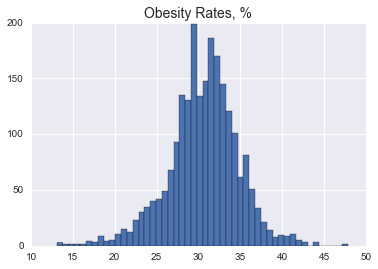

In [9]:
plt.hist(data['PCT_OBESE_ADULTS10'],bins=50)
plt.title('Obesity Rates, %', size = 14)

In [10]:
# calculate bottom and top values for 3 STD from the mean for the outcome variable
bottom_border=data['PCT_OBESE_ADULTS10'].mean()-3*data['PCT_OBESE_ADULTS10'].std()
top_border=data['PCT_OBESE_ADULTS10'].mean()+3*data['PCT_OBESE_ADULTS10'].std()
print bottom_border
print top_border

17.9017014807
43.275957143


In [11]:
outliers = data[(data['PCT_OBESE_ADULTS10']<bottom_border) | (data['PCT_OBESE_ADULTS10']>top_border)]['PCT_OBESE_ADULTS10'].sort_values()
outliers

FIPS
56039    13.1
8037     13.2
8107     13.4
35049    13.8
8097     14.2
8117     14.5
8013     14.9
49043    15.3
6041     15.4
8035     16.2
8015     16.2
8067     16.7
8113     16.9
8007     17.0
36119    17.2
8045     17.4
30031    17.5
8119     17.8
1085     43.8
28133    43.9
38085    44.3
28027    47.4
1063     47.9
Name: PCT_OBESE_ADULTS10, dtype: float64

### There are 23 rows with outliers in the outcome variable in the train data set

In [12]:
# Access and Proximity to Grocery Store variable

In [13]:
data.iloc[:,:5].corr()

,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,PCT_LACCESS_HHNV10
PCT_LACCESS_POP10,1.000000,0.907387,0.962960,0.924933,0.032980
PCT_LACCESS_LOWI10,0.907387,1.000000,0.885786,0.843961,0.226538
PCT_LACCESS_CHILD10,0.962960,0.885786,1.000000,0.830421,0.026032
PCT_LACCESS_SENIORS10,0.924933,0.843961,0.830421,1.000000,0.035306
PCT_LACCESS_HHNV10,0.032980,0.226538,0.026032,0.035306,1.000000


#### All  'Access and Proximity' predictor variables with the exception of PCT_LACCESS_HHNV10 are highly correlated

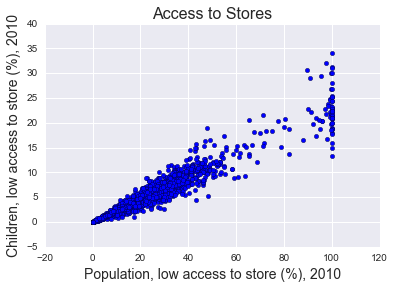

In [14]:
# create a scatter plot for two variables with high correlation
plt.scatter(data.PCT_LACCESS_POP10, data.PCT_LACCESS_CHILD10)
plt.xlabel('Population, low access to store (%), 2010',size = 14)
plt.ylabel('Children, low access to store (%), 2010',size = 14)
plt.title('Access to Stores', size=16)

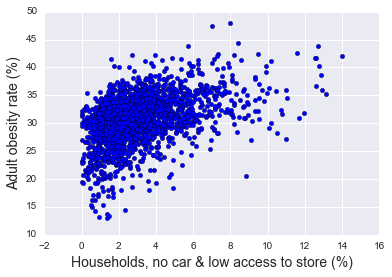

In [15]:
plt.scatter(data.PCT_LACCESS_HHNV10, data.PCT_OBESE_ADULTS10)
plt.xlabel('Households, no car & low access to store (%)', size = 14)
plt.ylabel('Adult obesity rate (%)', size = 14)

In [16]:
# Run correlations with all variables
# see the top 10 predicotrs (i.e. highest correlation with the outcome variable)

corr = data.corr()
corr['PCT_OBESE_ADULTS10'].sort_values(ascending=False).head(6)

PCT_OBESE_ADULTS10    1.000000
PCT_FREE_LUNCH10      0.499841
CHILDPOVRATE10        0.470555
PCT_SNAP09            0.462712
POVRATE10             0.460313
PCT_LACCESS_HHNV10    0.441692
Name: PCT_OBESE_ADULTS10, dtype: float64

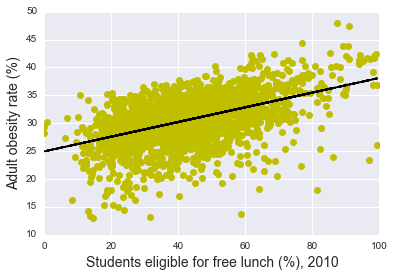

In [17]:
# create scatterplot of the most correlated variable
fit = np.polyfit(data.PCT_FREE_LUNCH10,data.PCT_OBESE_ADULTS10,1)
fit_fn = np.poly1d(fit) 

plt.plot(data.PCT_FREE_LUNCH10,data.PCT_OBESE_ADULTS10, 'yo', data.PCT_FREE_LUNCH10, fit_fn(data.PCT_FREE_LUNCH10), '--k')
plt.xlabel('Students eligible for free lunch (%), 2010', size=14)
plt.ylabel('Adult obesity rate (%)', size=14)

In [18]:
# compute the average of obesity rate for Persistent-poverty counties predictor
data.groupby(['PERPOV10'])[['PCT_OBESE_ADULTS10']].mean()

,PCT_OBESE_ADULTS10
PERPOV10,
0,30.072933
1,34.618504


In [19]:
# compute the average of obesity rate for Persistent-child-poverty counties counties
data.groupby(['PERCHLDPOV10'])[['PCT_OBESE_ADULTS10']].mean()

,PCT_OBESE_ADULTS10
PERCHLDPOV10,
0,29.774134
1,33.377470


In [20]:
data.head()

,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,PCT_LACCESS_HHNV10,GROCPTH07,SUPERCPTH07,CONVSPTH07,SPECSPTH07,SNAPSPTH08,...,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC10,POVRATE10,PERPOV10,CHILDPOVRATE10,PERCHLDPOV10,METRO13,POPLOSS00,PCT_OBESE_ADULTS10
FIPS,,,,,,,,,,,,,,,,,,,,,
19109,46.190288,11.392737,10.532197,10.594349,2.188645,0.517598,0.000000,1.293996,0.064700,0.634088,...,21.868365,22.872032,47930,10.3,0,13.8,0,0,1,31.1
39131,23.128594,10.872407,5.595606,4.319223,6.841612,0.179115,0.071646,0.716461,0.000000,1.059993,...,14.671357,24.800585,35051,26.3,0,36.9,1,0,0,32.1
5015,8.595426,4.054456,2.188032,1.396943,2.017592,0.183298,0.036660,1.759660,0.109979,0.415363,...,18.694892,22.527873,33789,16.4,0,26.5,1,0,0,28.7
47143,8.224891,4.529821,2.204625,1.070721,3.097653,0.196303,0.032717,0.556192,0.000000,0.909266,...,15.706247,23.439907,36308,20.6,0,32.2,0,0,0,37.2
19155,37.655753,12.175355,9.390865,5.193847,2.091801,0.167463,0.022328,0.502389,0.089314,0.526934,...,14.312244,24.129973,47870,14.5,0,19.4,0,1,0,33.6


## Check for multicollinearity

In [21]:
corr=data.iloc[:,:-1].corr()

In [22]:
# get eigen values for predictor variables
w, v = np.linalg.eig(corr)
eigen_val=pd.DataFrame({'feature':corr.columns,'epigen_value':w})
eigen_val

,epigen_value,feature
0,9.556060,PCT_LACCESS_POP10
1,6.933752,PCT_LACCESS_LOWI10
2,4.864587,PCT_LACCESS_CHILD10
3,3.668473,PCT_LACCESS_SENIORS10
4,2.901639,PCT_LACCESS_HHNV10
5,2.475528,GROCPTH07
6,2.243366,SUPERCPTH07
7,2.004019,CONVSPTH07
8,1.817163,SPECSPTH07
9,1.635960,SNAPSPTH08


In [23]:
# get predictors with eigen values close to zero
low_eigen = eigen_val[eigen_val.epigen_value < 0.01]

In [24]:
low_eigen

,epigen_value,feature
27,0.000595,PCT_WIC09
28,0.001541,PCT_CACFP09
29,0.007749,FOODINSEC_07_09


In [25]:
# Get vecors for features with eigen values close to zero
columns=data.columns.values[:-1]

vectors = pd.DataFrame({'Feature':columns})

for i in low_eigen.feature.values:
    index = low_eigen[low_eigen.feature == i].index
    vectors[i]=v[:,index]
vectors.head()

,Feature,PCT_WIC09,PCT_CACFP09,FOODINSEC_07_09
0,PCT_LACCESS_POP10,-0.014154,0.007147,0.795369
1,PCT_LACCESS_LOWI10,0.001616,0.002471,-0.038144
2,PCT_LACCESS_CHILD10,0.004192,-0.007290,-0.487998
3,PCT_LACCESS_SENIORS10,0.007697,0.000305,-0.321569
4,PCT_LACCESS_HHNV10,0.004866,-0.002173,-0.000535


In [26]:
# get features with eigen vectors that are NOT close to zero (i.e. strongly correlated with each other)
vectors.iloc[:,1:]=vectors.iloc[:,1:].abs()

In [27]:
# For each vector print features that have high collinearity
d={}
for i in range(1,len(vectors.columns)):
    d['collinear{0}'.format(i)] = vectors[vectors.iloc[:,i]>0.01].iloc[:,[0,i]]
    print vectors[vectors.iloc[:,i]>0.01].iloc[:,[0,i]]
    print "XXX"

              Feature  PCT_WIC09
0   PCT_LACCESS_POP10   0.014154
14      PC_FSRSALES07   0.011043
15         PCT_SNAP09   0.011593
22         PCT_NSLP09   0.020444
25          PCT_SBP09   0.020140
29    FOODINSEC_07_09   0.018293
30    VLFOODSEC_07_09   0.016012
32       MILK_PRICE10   0.026192
33       SODA_PRICE10   0.013417
34  MILK_SODA_PRICE10   0.028365
48      PCT_NHWHITE10   0.685061
49      PCT_NHBLACK10   0.499488
50         PCT_HISP10   0.457496
51      PCT_NHASIAN10   0.076047
52         PCT_NHNA10   0.248387
57          POVRATE10   0.011948
59     CHILDPOVRATE10   0.011661
XXX
                  Feature  PCT_CACFP09
7              CONVSPTH07     0.019214
12               FSRPTH07     0.019868
13          PC_FFRSALES07     0.024068
14          PC_FSRSALES07     0.018901
16       SNAP_PART_RATE10     0.013811
22             PCT_NSLP09     0.023606
23       PCT_FREE_LUNCH10     0.010139
25              PCT_SBP09     0.014625
27              PCT_WIC09     0.012671
28          

In [28]:
# Collinear variables can be tested to identify the best predictor and drop the rest of them
d['collinear1'].head()

,Feature,PCT_WIC09
0,PCT_LACCESS_POP10,0.014154
14,PC_FSRSALES07,0.011043
15,PCT_SNAP09,0.011593
22,PCT_NSLP09,0.020444
25,PCT_SBP09,0.020140


### Summary

- Records with the response variable = NULL were removed from the dataset

- Numerical columns that contained string values were converted to foat and string values were converted to NULLs

- Response variable ("Obesity rate") follows the normal distribution. Outliers are present on both bottom and top end of the value range of thee standard deviations

- Many predicor variables have outliers: *need to check if removing outliers will improve model preformace*

- Some of the predictor variables are highly correlated

- Multicollinearity test (using eigenvalues and eigenvectors) returned sets of collinear variables: *test and remove collinear features*

### Initial findings

- Counties with high poverty rates have ~5% higher obesity rates than counties with lower poverty rates as was stated in the hypothesis

- Percent of students in a County eligible for free lunch had the strongest correlation with a predictor variable

# Modeling

### Benchmark:

In [29]:
# Set a benchmark for linear regression model - MSE
y_mean = data['PCT_OBESE_ADULTS10'].mean()
MSE_benchmark = ((data['PCT_OBESE_ADULTS10'] - y_mean)**2).mean()
print "Performance benchmark MSE = %f" %(MSE_benchmark)

Performance benchmark MSE = 17.876810


In [30]:
# convert columns with type 'object' info float and coers invalid values to NaN
data_test[['MEDHHINC10','POVRATE10','CHILDPOVRATE10',
      'POPLOSS00']]=data_test[['MEDHHINC10',
                          'POVRATE10','CHILDPOVRATE10','POPLOSS00']].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [31]:
#drop rows with NULL values in predictor variable
data_test.dropna(subset=['PCT_OBESE_ADULTS10'],inplace=True) 

In [32]:
# Fill zero instead of NULL values 
data_test.fillna(value=0,inplace=True)

In [33]:
# set a list of features for the model 
feature_cols = list(data.columns.values)[:-1]
X_train = data[feature_cols]
y_train = data['PCT_OBESE_ADULTS10']

X_test = data_test[feature_cols]
y_test = data_test['PCT_OBESE_ADULTS10']

In [34]:
print len(X_train)
print len(X_test)

2238
785


## Build a Random Forest Model to identify feature importance

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model = RandomForestRegressor(n_estimators = 100)
    
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [36]:
features = X_train.columns

features_df = pd.DataFrame({'Features': features, 'Importance Score': model.feature_importances_.round(4)})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

# crete a table with top 20 featueres
top_20_rf = features_df['Features'].head(20)

print "Features sorted by their Importance score:"
features_df.head(10)

Features sorted by their Importance score:


,Features,Importance Score
23,PCT_FREE_LUNCH10,0.1057
47,NATAMEN,0.0962
15,PCT_SNAP09,0.0948
49,PCT_NHBLACK10,0.0788
14,PC_FSRSALES07,0.0614
51,PCT_NHASIAN10,0.0470
22,PCT_NSLP09,0.0418
12,FSRPTH07,0.0309
9,SNAPSPTH08,0.0305
52,PCT_NHNA10,0.0210


### Top Ten Predictors with the Highest Importance Score (Random Forest Model, n=estimators=100:

- Students eligible for free lunch (%), 2010
- SNAP participants (% pop), 2009*
- ERS natural amenity index, 1999
- % Black, 2010
- Expenditures per capita, restaurants ($), 2007*
- National School Lunch Program participants (% pop), 2009*
- % Asian, 2010
- Full-service restaurants/1,000 pop, 2007
- SNAP-authorized stores/1,000 pop, 2008
- % White, 2010

In [37]:
# 5 cross validation iterations
from sklearn.model_selection import KFold, cross_val_score
cv = KFold(n_splits=5, shuffle=True)

In [38]:
score = -np.mean(cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv))
print "Random Forest MSE on the train set: %f" %(score)

Random Forest MSE on the train set: 5.392096


In [39]:
# check how close the data are to the fitted regression line 
r2 = r2_score(y_test, model.predict(X_test))
print "R-squared = %f" %(r2)

R-squared = 0.685776


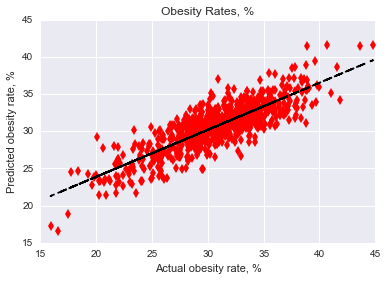

In [40]:
fit = np.polyfit(y_test,model.predict(X_test),1)
fit_fn = np.poly1d(fit) 

# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(y_test,model.predict(X_test), 'rd', y_test, fit_fn(y_test), '--k')
plt.xlabel('Actual obesity rate, %')
plt.ylabel('Predicted obesity rate, %')
plt.title('Obesity Rates, %')

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
# get MSE for test data set
MSE_rf = mean_squared_error(y_test, model.predict(X_test))
MSE_rf

5.4182644929936297

In [43]:
# Create performance score table to collect MSE resulrs for all tested models
Performance = pd.DataFrame({'Model': 'Random Forest', 'n_features': len(X_test.columns),'MSE':MSE_rf},index=[1])
Performance = Performance[['Model','n_features','MSE']]

# Linear Regression Model

## FOR LOOP for Linear Regression - feature testing 

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

In [46]:
# loop through the features by adding one feature each step starting with feature with the highest importance score (RF)

features = features_df.Features.values

feature_cols=[]
scores = []

y_train = data['PCT_OBESE_ADULTS10']
y_test = data_test['PCT_OBESE_ADULTS10']

for i in features:
    feature_cols.append(i)
    
    X_train=data[feature_cols]
    X_test=data_test[feature_cols]

    X_train_std = stdsc.fit_transform(X_train)
    X_test_std = stdsc.transform(X_test)
    
    lr = LinearRegression()
    lr.fit(X_train_std, y_train)
    
    score = -np.mean(cross_val_score(lr, X_train_std, y_train, scoring='neg_mean_squared_error', cv=cv))
    scores.append(score)

In [47]:
scores = pd.DataFrame(scores, index=range(1,len(features)+1),columns=["MSE"])
scores.index.name = 'N of Features'

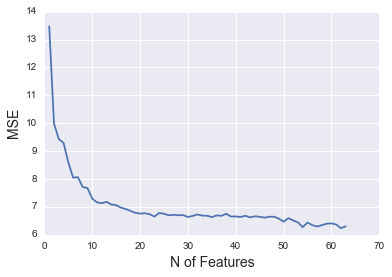

In [48]:
plt.plot(scores.index, scores.MSE)
plt.xlabel('N of Features', size = 14)
plt.ylabel('MSE', size = 14)

In [49]:
MSE_lr_all = mean_squared_error(y_test, lr.predict(X_test_std))
MSE_lr_all

8.619311726714356

In [50]:
Performance.loc[-1] = ['Linear Regression _all_features', len(X_test.columns), MSE_lr_all]
Performance.index = Performance.index + 1 

In [51]:
Performance

,Model,n_features,MSE
2,Random Forest,63,5.418264
0,Linear Regression _all_features,63,8.619312


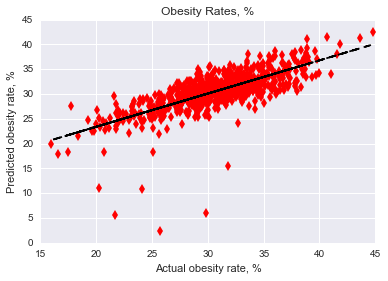

In [52]:
fit = np.polyfit(y_test,lr.predict(X_test_std),1)
fit_fn = np.poly1d(fit) 

plt.plot(y_test,lr.predict(X_test_std), 'rd', y_test, fit_fn(y_test), '--k')
plt.xlabel('Actual obesity rate, %')
plt.ylabel('Predicted obesity rate, %')
plt.title('Obesity Rates, %')

## Linear regression with top 80% features from Random Forest

In [53]:
# Take top 80% of features from Random Forest model by Importance Score

features_df['Running Sum']= features_df['Importance Score'].cumsum()

top_80pct_rf = features_df[features_df['Running Sum']<=0.8]
top_80pct_rf

,Features,Importance Score,Running Sum
23,PCT_FREE_LUNCH10,0.1057,0.1057
47,NATAMEN,0.0962,0.2019
15,PCT_SNAP09,0.0948,0.2967
49,PCT_NHBLACK10,0.0788,0.3755
14,PC_FSRSALES07,0.0614,0.4369
51,PCT_NHASIAN10,0.0470,0.4839
22,PCT_NSLP09,0.0418,0.5257
12,FSRPTH07,0.0309,0.5566
9,SNAPSPTH08,0.0305,0.5871
52,PCT_NHNA10,0.0210,0.6081


In [54]:
print "Top 80 percent of features represent %d features" %(len(top_80pct_rf))

Top 80 percent of features represent 22 features


In [55]:
feature_cols = top_80pct_rf.Features.values
feature_cols

array(['PCT_FREE_LUNCH10', 'NATAMEN', 'PCT_SNAP09', 'PCT_NHBLACK10',
       'PC_FSRSALES07', 'PCT_NHASIAN10', 'PCT_NSLP09', 'FSRPTH07',
       'SNAPSPTH08', 'PCT_NHNA10', 'PCT_NHWHITE10', 'PCT_HISP10',
       'PCT_SFSP09', 'PCT_LACCESS_HHNV10', 'PCT_18YOUNGER10', 'CONVSPTH07',
       'PCT_LOCLFARM07', 'POVRATE10', 'MEDHHINC10', 'PCT_65OLDER10',
       'RECFACPTH07', 'PC_FFRSALES07'], dtype=object)

In [56]:
# set a list of features for top 80% of features for Linear Regression model 
feature_cols = top_80pct_rf.Features.values

X_train = data[feature_cols]
X_test = data_test[feature_cols]

In [57]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

# transform training and test features
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [58]:
lr = LinearRegression()

In [59]:
lr.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
pd.DataFrame(zip(X_train.columns, lr.coef_), columns=['features', 'coefs']).sort_values('coefs')

,features,coefs
10,PCT_NHWHITE10,-3.351318
11,PCT_HISP10,-2.691712
3,PCT_NHBLACK10,-1.527594
7,FSRPTH07,-1.428162
9,PCT_NHNA10,-0.804137
5,PCT_NHASIAN10,-0.791241
1,NATAMEN,-0.779704
18,MEDHHINC10,-0.639649
4,PC_FSRSALES07,-0.435997
16,PCT_LOCLFARM07,-0.349333


In [61]:
MSE_lr = -np.mean(cross_val_score(lr, X_train_std, y_train, scoring='neg_mean_squared_error', cv=cv))
print "Linear Regression MSE score on a train set: %f" %(MSE_lr)

Linear Regression MSE score on a train set: 6.740708


In [62]:
r2 = lr.score(X_test_std,y_test)
print "R squared = %f" %(r2)

R squared = 0.588249


In [63]:
MSE_lr = -np.mean(cross_val_score(lr, X_test_std, y_test, scoring='neg_mean_squared_error', cv=cv))
print "Linear Regression MSE score on a test set: %f" %(MSE_lr)

Linear Regression MSE score on a test set: 7.660215


In [64]:
Performance.loc[-1] = ['Linear Regression', len(X_test.columns), MSE_lr]
Performance.index = Performance.index + 1 

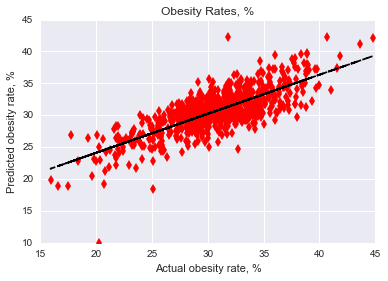

In [65]:
fit = np.polyfit(y_test,lr.predict(X_test_std),1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(y_test,lr.predict(X_test_std), 'rd', y_test, fit_fn(y_test), '--k')
plt.xlabel('Actual obesity rate, %')
plt.ylabel('Predicted obesity rate, %')
plt.title('Obesity Rates, %')

## Linear Regression with Outliers Removed

In [66]:
residuals = pd.DataFrame(X_train)
residuals['Predicted Response'] = lr.predict(X_train_std)
residuals['Actual Response'] = y_train
residuals['Residual'] = lr.predict(X_train_std) - y_train

In [67]:
residuals[(residuals['Residual']>7.5) | (residuals['Residual']<-8)].sort_values('Residual')

,PCT_FREE_LUNCH10,NATAMEN,PCT_SNAP09,PCT_NHBLACK10,PC_FSRSALES07,PCT_NHASIAN10,PCT_NSLP09,FSRPTH07,SNAPSPTH08,PCT_NHNA10,...,CONVSPTH07,PCT_LOCLFARM07,POVRATE10,MEDHHINC10,PCT_65OLDER10,RECFACPTH07,PC_FFRSALES07,Predicted Response,Actual Response,Residual
FIPS,,,,,,,,,,,,,,,,,,,,,
53015,42.431590,5.0,11.422535,0.558539,713.269544,1.437360,7.990853,0.646400,0.662320,1.328972,...,0.805513,23.1,20.6,43031,15.433063,0.069612,683.838862,27.717783,36.7,-8.982217
53049,41.253181,6.0,11.422535,0.320268,713.269544,2.026769,7.990853,1.351477,0.913007,2.041109,...,1.631093,8.5,17.9,37832,24.775335,0.186411,683.838862,26.629571,35.0,-8.370429
49043,17.825143,6.0,6.653877,0.302830,506.978648,1.211320,12.127896,2.341392,0.276182,0.245017,...,2.482440,6.5,7.6,74535,7.620306,0.253886,669.738385,22.894055,15.3,7.594055
8037,31.455399,5.0,6.350985,0.465544,900.316210,0.990478,7.778858,2.392818,0.153790,0.256720,...,2.412593,7.9,8.5,69182,5.628676,0.158203,747.095794,21.082899,13.2,7.882899
30031,18.698098,5.0,9.482466,0.309452,745.824351,1.129445,8.887485,1.225659,0.271864,0.802118,...,1.225659,5.5,12.9,49354,9.462313,0.137457,549.185043,25.607347,17.5,8.107347
35055,81.286031,5.0,14.483614,0.315754,611.676120,0.610256,11.037727,1.739736,0.637404,5.304065,...,1.802999,10.2,18.6,32940,17.084130,0.189789,737.196860,26.492919,18.0,8.492919
35049,58.835500,5.0,14.483614,0.656863,611.676120,1.088299,11.037727,1.143901,0.329064,2.268849,...,1.143901,14.9,16.5,48507,15.123812,0.118575,737.196860,25.108497,13.8,11.308497


(-15, 15)

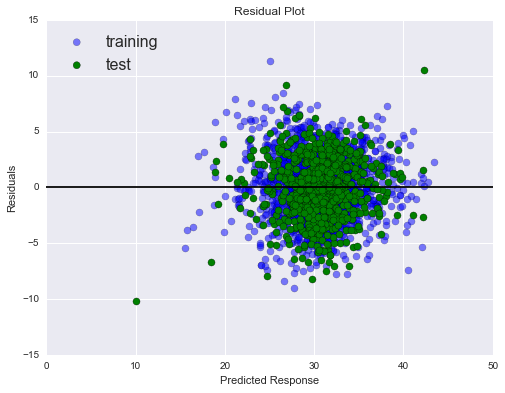

In [68]:
# create a resdidual plot to check for errors in the data
plt.figure(figsize=(8,6))
plt.scatter(lr.predict(X_train_std), lr.predict(X_train_std)-y_train, c='b', s=50, alpha=0.5, label='training')
plt.scatter(lr.predict(X_test_std), lr.predict(X_test_std)-y_test, c='g',s=50, label='test')
plt.legend(loc='upper left',prop={'size':16})
plt.xlabel('Predicted Response')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.xlim(0,50)
plt.ylim(-15,15)

In [69]:
# Remove Response value outliers outside of the three STDs from the mean

feature_cols = top_80pct_rf.Features.values
X = data
X_test = data_test[feature_cols]


response_mean = y_train.mean()
response_std = y_train.std()

X = X[(X.PCT_OBESE_ADULTS10 >  (response_mean-3*response_std)) &
      (X.PCT_OBESE_ADULTS10 <  (response_mean+3*response_std))]

y_train = X['PCT_OBESE_ADULTS10']
X_train = X[feature_cols]

In [70]:
len(X_train)

2215

In [71]:
# transform training and test features

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [72]:
lr = LinearRegression()

In [73]:
lr.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
lr.coef_

array([ 0.46438192, -0.67494291,  0.64525278, -1.14179307, -0.43908463,
       -0.8134289 ,  0.12204205, -1.12589626,  0.2192893 , -0.59445886,
       -2.74196154, -2.29380654, -0.24135358,  0.18913934,  0.46725872,
        0.66504878, -0.39012276, -0.180959  , -0.48785115, -0.02976412,
       -0.19966138, -0.25018671])

In [75]:
MSE_lr = -np.mean(cross_val_score(lr, X_train_std, y_train, scoring='neg_mean_squared_error', cv=cv))
print "Linear Regression MSE score on a train set: %f" %(MSE_lr)

Linear Regression MSE score on a train set: 6.348386


In [76]:
Performance.loc[-1] = ['Linear Regression_no outliers', len(X_test.columns), MSE_lr]
Performance.index = Performance.index + 1 

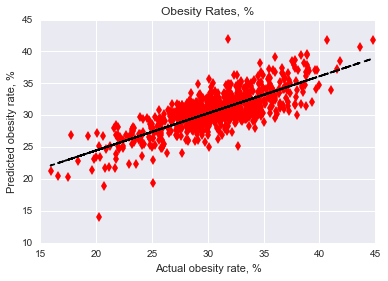

In [77]:
fit = np.polyfit(y_test,lr.predict(X_test_std),1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(y_test,lr.predict(X_test_std), 'rd', y_test, fit_fn(y_test), '--k')
plt.xlabel('Actual obesity rate, %')
plt.ylabel('Predicted obesity rate, %')
plt.title('Obesity Rates, %')

# MSE with outliers removed produced the best result

In [78]:
# rmove reponse variables outliers from data
response_mean = data['PCT_OBESE_ADULTS10'].mean()
response_std = data['PCT_OBESE_ADULTS10'].std()
print response_mean
print response_std

30.5888293119
4.22904261038


In [79]:
# rmove reponse variables outliers from data
data = data[(data.PCT_OBESE_ADULTS10 >  (response_mean-3*response_std)) &
      (data.PCT_OBESE_ADULTS10 <  (response_mean+3*response_std))]

## Get coefficients for collinear features

In [80]:
d['collinear1']

,Feature,PCT_WIC09
0,PCT_LACCESS_POP10,0.014154
14,PC_FSRSALES07,0.011043
15,PCT_SNAP09,0.011593
22,PCT_NSLP09,0.020444
25,PCT_SBP09,0.020140
29,FOODINSEC_07_09,0.018293
30,VLFOODSEC_07_09,0.016012
32,MILK_PRICE10,0.026192
33,SODA_PRICE10,0.013417
34,MILK_SODA_PRICE10,0.028365


In [81]:
# update response variables to put back outliers
# y_train = data['PCT_OBESE_ADULTS10']
# y_test = data_test['PCT_OBESE_ADULTS10']

In [82]:
# loop through every colinera feature  (from multicillinearity test - eigen vectors)

columns = ['Feature','MSE']
scores = pd.DataFrame([])

for i in range(1,len(vectors.columns)):
    table = d['collinear{0}'.format(i)]
    features = table.Feature.values
    
    for f in features:
        feature_col = [f]
    
        X_train=data[feature_col]
    
        lr = LinearRegression()
        lr.fit(X_train, y_train)
    
        MSE  = -np.mean(cross_val_score(lr, X_train, y_train, scoring='neg_mean_squared_error', cv=cv))
        score = pd.DataFrame({'Feature':f,'MSE':MSE},index=[0])
        scores = scores.append(score)
    print "Best feature from collinear set %d" %(i)
    print scores.sort_values('MSE').head(1)
    print "------------------"

Best feature from collinear set 1
          Feature        MSE
0  CHILDPOVRATE10  12.493695
------------------
Best feature from collinear set 2
            Feature        MSE
0  PCT_FREE_LUNCH10  12.025764
------------------
Best feature from collinear set 3
            Feature        MSE
0  PCT_FREE_LUNCH10  12.025764
------------------


In [83]:
# check correlation between the best features out of collinear feature sets:
best_of_col = data[['CHILDPOVRATE10','PCT_FREE_LUNCH10']]
best_of_col.corr()

,CHILDPOVRATE10,PCT_FREE_LUNCH10
CHILDPOVRATE10,1.000000,0.823303
PCT_FREE_LUNCH10,0.823303,1.000000


## Test Linear Regression with all non-collinear Features and best feature out of collinear feature set

In [84]:
dfs = [d['collinear1'].Feature,d['collinear2'].Feature,d['collinear3'].Feature]
#append dataframes into one
collinear_feat = list(reduce(lambda left,right: left.append(right), dfs))

In [85]:
all_feat = list(data.columns[:-1])

In [86]:
non_collinear_feat = set(all_feat) - set(collinear_feat)

In [87]:
non_col_features = list(non_collinear_feat)

In [88]:
non_col_features.insert(0,"PCT_FREE_LUNCH10")

In [89]:
X_train = data[non_col_features]

X_test = data_test[non_col_features]

In [90]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [91]:
lr = LinearRegression()
lr.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
MSE_lr_non_col = mean_squared_error(y_test, lr.predict(X_test_std))
MSE_lr_non_col

9.3571769776865317

# Lasso and Ridge

### Lasso with Gridsearch

In [93]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

In [94]:
feature_cols = list(data.columns.values)[:-1]

X_train = data[feature_cols]
X_test = data_test[feature_cols]

In [95]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [96]:
parameters = {'alpha' : np.linspace(0.0001,100,1000)}
lasso = Lasso()
clf = GridSearchCV(lasso, parameters, cv=cv)
clf.fit(X_train_std,y_train)

/Users/Lenka/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-04,   1.00200e-01, ...,   9.98999e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [97]:
# get the best performing combo
clf.best_params_

{'alpha': 0.0001}

## Lasso with best alpha parameter

In [98]:
lasso = Lasso(alpha=0.0001)

In [99]:
lasso.fit(X_train_std, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [100]:
MSE_las = -np.mean(cross_val_score(lasso, X_test_std, y_test, scoring='neg_mean_absolute_error'))
MSE_las

2.1477607451194278

In [101]:
Performance.loc[-1] = ['Lasso (alpha=0.0001)', len(X_test.columns), MSE_las]
Performance.index = Performance.index + 1 

In [102]:
# get coefficients 
feature_coefs = pd.DataFrame({'Features':X_train.columns,'Coef':lasso.coef_})

In [103]:
feature_coefs.sort_values('Coef')

,Coef,Features
48,-3.816050,PCT_NHWHITE10
50,-3.031816,PCT_HISP10
32,-1.837127,MILK_PRICE10
49,-1.799479,PCT_NHBLACK10
27,-1.296757,PCT_WIC09
31,-0.989063,FOODINSEC_CHILD_01_07
51,-0.952509,PCT_NHASIAN10
52,-0.875175,PCT_NHNA10
12,-0.815859,FSRPTH07
38,-0.708273,FRESHVEG_FARMS07


In [104]:
feature_coefs['sort'] = feature_coefs.Coef.abs()
top_20_lasso = feature_coefs.sort_values('sort',ascending=False)['Features'].head(20)
feature_coefs.drop(['sort'],axis = 1, inplace=True)
top_20_lasso

48            PCT_NHWHITE10
50               PCT_HISP10
34        MILK_SODA_PRICE10
32             MILK_PRICE10
49            PCT_NHBLACK10
27                PCT_WIC09
33             SODA_PRICE10
31    FOODINSEC_CHILD_01_07
51            PCT_NHASIAN10
52               PCT_NHNA10
12                 FSRPTH07
29          FOODINSEC_07_09
37              VEG_FARMS07
15               PCT_SNAP09
55          PCT_18YOUNGER10
38         FRESHVEG_FARMS07
25                PCT_SBP09
0         PCT_LACCESS_POP10
22               PCT_NSLP09
7                CONVSPTH07
Name: Features, dtype: object

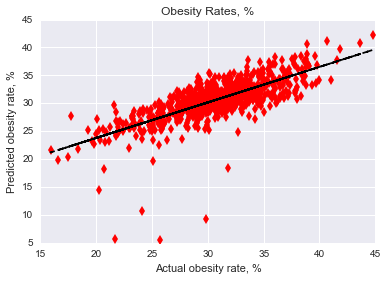

In [105]:
fit = np.polyfit(y_test,lasso.predict(X_test_std),1)
fit_fn = np.poly1d(fit) 

plt.plot(y_test,lasso.predict(X_test_std), 'rd', y_test, fit_fn(y_test), '--k')
plt.xlabel('Actual obesity rate, %')
plt.ylabel('Predicted obesity rate, %')
plt.title('Obesity Rates, %')

In [106]:
feature_coefs['Coef'] = feature_coefs['Coef'].abs()
feature_coefs.sort_values(by=['Coef'],ascending=False,inplace=True)

feature_test = feature_coefs.Features.values

In [107]:
Performance

,Model,n_features,MSE
5,Random Forest,63,5.418264
3,Linear Regression _all_features,63,8.619312
2,Linear Regression,22,7.660215
1,Linear Regression_no outliers,22,6.348386
0,Lasso (alpha=0.0001),63,2.147761


## Test variables in each category agains the response variable

In [108]:
# create lists with variable names for each category
access = list(data.columns.values)[0:5]
store_avail = list(data.columns.values)[5:11]
restaurant_avail = list(data.columns.values)[11:15]
food_assist = list(data.columns.values)[15:29]
food_insecureity = list(data.columns.values)[29:32]
food_price_tax = list(data.columns.values)[32:35]
local_foods = list(data.columns.values)[35:46]
health_physical = list(data.columns.values)[46:48]
socioec = list(data.columns.values)[48:63]

categories = [access,store_avail,restaurant_avail,food_assist,food_insecureity,
              food_price_tax,local_foods,health_physical,socioec]


lasso = Lasso(alpha=0.0001)
feature_cols = []
MSE_scores=[]

for i in categories:
    feature_cols = i
    
    X_train = data[feature_cols]
    X_test = data_test[feature_cols]

    X_train_std = stdsc.fit_transform(X_train)
    X_test_std = stdsc.transform(X_test)
    
    lasso.fit(X_train_std, y_train)
    
    score = -np.mean(cross_val_score(lasso, X_test_std, y_test, scoring='neg_mean_squared_error', cv=cv))
    MSE_scores.append(score)

In [109]:
categories = ['access','store_avail','restaurant_avail','food_assist','food_insecureity',
             'food_price_tax','local_foods','health_physical','socioec']
MSE_by_categoty = pd.DataFrame({'category':categories,'MSE':MSE_scores})
MSE_by_categoty.sort_values('MSE',ascending = True,inplace = True)
MSE_by_categoty

,MSE,category
8,9.807942,socioec
3,10.002886,food_assist
2,12.867841,restaurant_avail
1,13.698132,store_avail
0,14.338628,access
7,14.634672,health_physical
6,16.142850,local_foods
4,16.350488,food_insecureity
5,16.472871,food_price_tax


In [110]:
categories = MSE_by_categoty['category'].values

In [111]:
categories

array(['socioec', 'food_assist', 'restaurant_avail', 'store_avail',
       'access', 'health_physical', 'local_foods', 'food_insecureity',
       'food_price_tax'], dtype=object)

''

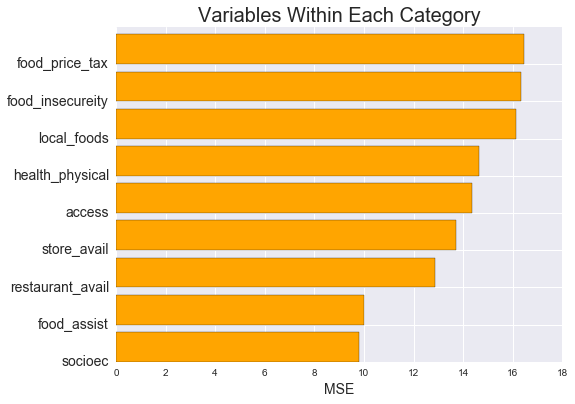

In [112]:
plt.figure(figsize = (8,6))

plt.barh(np.arange(len(MSE_by_categoty['category'])), MSE_by_categoty['MSE'], color='orange')
plt.xlabel('MSE',size=14)
plt.yticks(np.arange(len(categories)),categories,size=14)
plt.title('Variables Within Each Category',size=20)
;

## Try Lasso with non-collinear features 

In [113]:
X_train = data[non_col_features] 
X_test = data_test[non_col_features] 

In [114]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [115]:
lasso = Lasso(alpha=0.0001)

In [116]:
lasso.fit(X_train_std, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [117]:
# get coefficients 
feature_coefs = pd.DataFrame({'Features':X_train.columns,'Coef':lasso.coef_})

In [118]:
len(X_train.columns)

32

In [119]:
feature_coefs.sort_values('Coef')

,Coef,Features
26,-1.271035,NATAMEN
30,-0.494229,PCT_LOCLFARM07
17,-0.337603,WICSPTH08
2,-0.301298,FARM_TO_SCHOOL
7,-0.263683,MEDHHINC10
23,-0.235023,RECFACPTH07
15,-0.233475,PCT_SFSP09
21,-0.200839,GROCPTH07
20,-0.180413,FFRPTH07
25,-0.156754,GHVEG_FARMS07


In [120]:
MSE_las_non_col = -np.mean(cross_val_score(lasso, X_test_std, y_test, scoring='neg_mean_absolute_error'))
MSE_las_non_col

2.5100314142814404

In [121]:
Performance.loc[-1] = ['Lasso_non collinear_features', len(X_test.columns), MSE_las_non_col]
Performance.index = Performance.index + 1 

In [122]:
Performance.sort_values('MSE')

,Model,n_features,MSE
1,Lasso (alpha=0.0001),63,2.147761
0,Lasso_non collinear_features,32,2.510031
6,Random Forest,63,5.418264
2,Linear Regression_no outliers,22,6.348386
3,Linear Regression,22,7.660215
4,Linear Regression _all_features,63,8.619312


## Ridge

In [123]:
X_train = data.iloc[:,:-1]
X_test = data_test.iloc[:,:-1]

In [124]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [125]:
parameters = {'alpha' : np.linspace(0.0001,100,1000)}
ridge = Ridge()
clf = GridSearchCV(ridge, parameters, cv=cv)
clf.fit(X_train_std,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-04,   1.00200e-01, ...,   9.98999e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [126]:
# get the best performing combo
clf.best_params_

{'alpha': 0.40049999999999997}

In [127]:
ridge=Ridge(alpha=0.1002)

In [128]:
ridge.fit(X_train_std, y_train)

Ridge(alpha=0.1002, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [129]:
MSE_ridge = -np.mean(cross_val_score(ridge, X_test_std, y_test, scoring='neg_mean_absolute_error'))
MSE_ridge

2.1469317388068885

In [130]:
Performance.loc[-1] = ['Ridge (alpha=0.1002)', len(X_test.columns), MSE_ridge]
Performance.index = Performance.index + 1

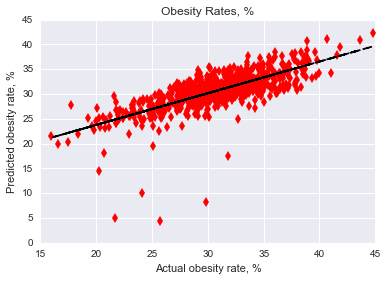

In [131]:
fit = np.polyfit(y_test,ridge.predict(X_test_std),1)
fit_fn = np.poly1d(fit) 

plt.plot(y_test,ridge.predict(X_test_std), 'rd', y_test, fit_fn(y_test), '--k')
plt.xlabel('Actual obesity rate, %')
plt.ylabel('Predicted obesity rate, %')
plt.title('Obesity Rates, %')

## PCA

In [132]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [133]:
X_train = data.iloc[:,:-1]
X_test = data_test.iloc[:,:-1]

In [134]:
pca = PCA()

In [135]:
pca.fit_transform(scale(X_train))

array([[ -3.11230426e+00,  -4.19076243e+00,   2.29468889e-02, ...,
         -4.15805945e-02,   2.36438707e-02,   1.72976654e-03],
       [  1.40284216e+00,   1.04856716e-01,  -1.70554392e+00, ...,
         -7.46759032e-03,  -2.02450663e-02,   4.32248805e-03],
       [  1.72403412e+00,  -1.51216080e-01,   1.75383160e-01, ...,
         -2.34359747e-02,   1.10521725e-02,  -1.28921237e-02],
       ..., 
       [  3.47220641e+00,   1.34626221e-01,   1.69102871e+00, ...,
          3.93688528e-03,  -7.53001705e-02,  -1.47410143e-02],
       [ -3.38248234e+00,  -3.05297880e-01,  -1.84982395e+00, ...,
         -4.31036114e-02,  -2.52434378e-03,  -1.20508473e-02],
       [ -1.36254807e+00,  -3.77291757e-01,   1.64775649e+00, ...,
          2.87996732e-01,  -2.55900333e-03,   2.15655269e-02]])

In [136]:
print("Explained Variance: %s") % (pca.explained_variance_ratio_)

Explained Variance: [  1.50465431e-01   1.10956989e-01   7.74457933e-02   5.84997732e-02
   4.53849571e-02   3.93998321e-02   3.50934463e-02   3.17378860e-02
   2.88428082e-02   2.59716499e-02   2.14134151e-02   1.98489555e-02
   1.86999589e-02   1.80784039e-02   1.65408716e-02   1.63807712e-02
   1.54448713e-02   1.43758876e-02   1.37634383e-02   1.37121660e-02
   1.25087646e-02   1.22682678e-02   1.20903766e-02   1.18212565e-02
   1.10812744e-02   1.09088025e-02   1.01575674e-02   9.79239445e-03
   9.44663440e-03   9.21956945e-03   9.01208770e-03   8.67801663e-03
   8.06082288e-03   7.65484466e-03   7.20695127e-03   6.95379180e-03
   6.32662864e-03   6.01057434e-03   5.85349969e-03   5.50725670e-03
   5.26425882e-03   5.00994902e-03   4.95275582e-03   4.57200606e-03
   4.16585996e-03   4.03474559e-03   3.67606064e-03   3.36412101e-03
   2.48625896e-03   1.77875470e-03   1.62755999e-03   1.43574681e-03
   1.15099603e-03   9.08638514e-04   8.45113101e-04   6.49553006e-04
   3.96986779e

In [137]:
print "Explained Variance: (% cumulative)"
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

Explained Variance: (% cumulative)


array([  15.05,   26.15,   33.89,   39.74,   44.28,   48.22,   51.73,
         54.9 ,   57.78,   60.38,   62.52,   64.5 ,   66.37,   68.18,
         69.83,   71.47,   73.01,   74.45,   75.83,   77.2 ,   78.45,
         79.68,   80.89,   82.07,   83.18,   84.27,   85.29,   86.27,
         87.21,   88.13,   89.03,   89.9 ,   90.71,   91.48,   92.2 ,
         92.9 ,   93.53,   94.13,   94.72,   95.27,   95.8 ,   96.3 ,
         96.8 ,   97.26,   97.68,   98.08,   98.45,   98.79,   99.04,
         99.22,   99.38,   99.52,   99.64,   99.73,   99.81,   99.87,
         99.91,   99.95,   99.98,  100.  ,  100.01,  100.01,  100.01])

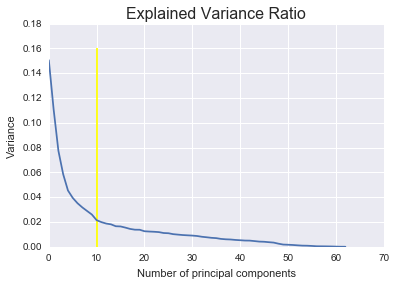

In [138]:
plt.plot(range(63), pca.explained_variance_ratio_)
plt.xlabel('Number of principal components')
plt.ylabel('Variance')
plt.title('Explained Variance Ratio',size=16)
plt.vlines(x=10, ymin=0, ymax=0.16,colors='yellow')

In [139]:
# test lasso with PCA - Mason's advice

X_train = data.iloc[:,:-1]
X_test = data_test.iloc[:,:-1]

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [140]:
# to transform X_train and X_test
pca = PCA(n_components=10)
X_train_transformed = pca.fit_transform(X_train_std)
X_test_transformed = pca.transform(X_test_std)

In [141]:
# now you can fit the lasso and test performance
lasso = Lasso(alpha = 0.0001)

In [142]:
lasso.fit(X_train_transformed, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [143]:
MSE_pca_lasso_train = -np.mean(cross_val_score(lasso, X_train_transformed, y_train, scoring='neg_mean_squared_error', cv=cv))
MSE_pca_lasso_train

7.3283984711111883

In [144]:
MSE_pca_lasso = -np.mean(cross_val_score(lasso, X_test_transformed, y_test, scoring='neg_mean_squared_error', cv=cv))
MSE_pca_lasso

8.958844883088414

In [145]:
Performance.loc[-1] = ['Principal Component Lasso', len(X_test_transformed), MSE_pca_lasso]
Performance.index = Performance.index + 1 

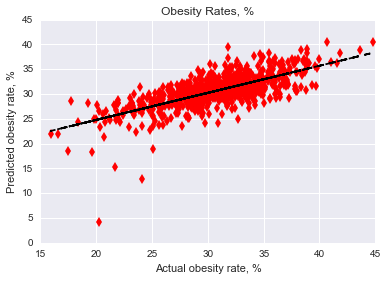

In [146]:
fit = np.polyfit(y_test,lasso.predict(X_test_transformed),1)
fit_fn = np.poly1d(fit) 

plt.plot(y_test,lasso.predict(X_test_transformed), 'rd', y_test, fit_fn(y_test), '--k')
plt.xlabel('Actual obesity rate, %')
plt.ylabel('Predicted obesity rate, %')
plt.title('Obesity Rates, %')

## Feature selection tests

## Recursive Feature Elimination for Linear Regression

In [154]:
from sklearn.feature_selection import RFE
# load data

X_train = data.iloc[:,:-1]
X_test = data_test.iloc[:,:-1]

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# feature extraction
scores = []
model = LinearRegression()
for i in range(1,64):
    rfe = RFE(model, i)
    fit = rfe.fit(X_train_std, y_train)
    score = -np.mean(cross_val_score(rfe, X_train_std, y_train, scoring='neg_mean_squared_error', cv=cv))
    scores.append(score)

In [155]:
scores = pd.DataFrame(scores, index=range(1,64),columns=["MSE"])
scores.index.name = 'N of Features'

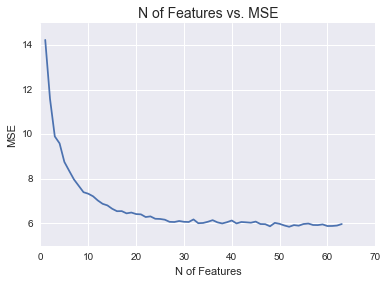

In [156]:
plt.plot(scores.index, scores.MSE)
plt.xlabel('N of Features')
plt.ylabel('MSE')
plt.title('N of Features vs. MSE',size=14)

In [158]:
feature_ranks = rfe.ranking_

In [171]:
ranked_features = pd.DataFrame({'Feature':X_train.columns,'Rank':feature_ranks})
ranked_features.sort_values('Rank',ascending=True,inplace=True)
ranked_features

,Feature,Rank
31,FOODINSEC_CHILD_01_07,1
27,PCT_WIC09,1
29,FOODINSEC_07_09,1
17,SNAP_OAPP10,1
15,PCT_SNAP09,1
35,PCT_LOCLFARM07,1
37,VEG_FARMS07,1
12,FSRPTH07,1
22,PCT_NSLP09,1
47,NATAMEN,1


In [172]:
ranked_features[ranked_features.Rank<=1].sum()

Feature    FOODINSEC_CHILD_01_07PCT_WIC09FOODINSEC_07_09S...
Rank                                                      20
dtype: object

In [173]:
top_features = ranked_features[ranked_features.Rank<=1]['Feature'].values

In [192]:
ranked_features[ranked_features.Rank<=1]['Feature']

31    FOODINSEC_CHILD_01_07
27                PCT_WIC09
29          FOODINSEC_07_09
17              SNAP_OAPP10
15               PCT_SNAP09
35           PCT_LOCLFARM07
37              VEG_FARMS07
12                 FSRPTH07
22               PCT_NSLP09
47                  NATAMEN
38         FRESHVEG_FARMS07
49            PCT_NHBLACK10
7                CONVSPTH07
50               PCT_HISP10
51            PCT_NHASIAN10
52               PCT_NHNA10
55          PCT_18YOUNGER10
56               MEDHHINC10
48            PCT_NHWHITE10
23         PCT_FREE_LUNCH10
Name: Feature, dtype: object

In [175]:
# test lasso with top features
X_train = data[top_features]
X_test = data_test[top_features]

In [176]:
parameters = {'alpha' : np.linspace(0.0001,100,1000)}
ridge = Ridge()
clf = GridSearchCV(ridge, parameters, cv=cv)
clf.fit(X_train_std,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-04,   1.00200e-01, ...,   9.98999e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [177]:
# get the best performing combo
clf.best_params_

{'alpha': 0.20029999999999998}

In [178]:
ridge = Ridge(alpha=0.1002)

In [179]:
ridge.fit(X_train_std,y_train)

Ridge(alpha=0.1002, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [180]:
MSE_ridge_rfe = -np.mean(cross_val_score(ridge, X_test_std, y_test, scoring='neg_mean_absolute_error'))
MSE_ridge_rfe

2.1469317388068885

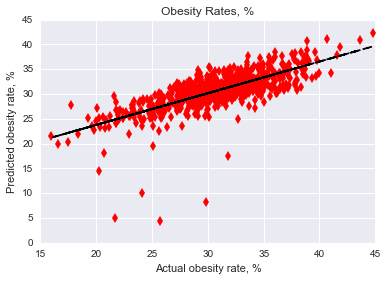

In [181]:
fit = np.polyfit(y_test,ridge.predict(X_test_std),1)
fit_fn = np.poly1d(fit) 

plt.plot(y_test,ridge.predict(X_test_std), 'rd', y_test, fit_fn(y_test), '--k')
plt.xlabel('Actual obesity rate, %')
plt.ylabel('Predicted obesity rate, %')
plt.title('Obesity Rates, %')

In [182]:
# re-load data

X_train = data.iloc[:,:-1]
X_test = data_test.iloc[:,:-1]

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [183]:
model = LinearRegression()

In [184]:
# run the model with number of features = 20
rfe = RFE(model,20)
fit = rfe.fit(X_train_std, y_train)

In [185]:
MSE_rfe = -np.mean(cross_val_score(rfe, X_test_std, y_test, scoring='neg_mean_absolute_error'))
MSE_rfe

2.2372858271316174

In [186]:
Performance.loc[-1] = ['Recursive feature elemination_lr', len(X_test.columns), MSE_rfe]
Performance.index = Performance.index + 1 

In [187]:
Performance.sort_values('MSE',ascending=True,inplace=True)
Performance

,Model,n_features,MSE
3,Ridge (alpha=0.1002),63,2.146932
5,Lasso (alpha=0.0001),63,2.147761
1,Recursive feature elemination_lr,63,2.237286
0,Recursive feature elemination_lr,63,2.237286
4,Lasso_non collinear_features,32,2.510031
10,Random Forest,63,5.553435
6,Linear Regression_no outliers,22,6.296966
7,Linear Regression,22,7.312342
8,Linear Regression _all_features,63,8.619312
2,Principal Component Lasso,785,9.284392
